In [72]:
import pandas as pd
import seaborn as sns

In [73]:
p_df = sns.load_dataset("penguins")

In [74]:
p_df.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female


In [75]:
p_df.island.unique()

array(['Torgersen', 'Biscoe', 'Dream'], dtype=object)

#### drooping nas

In [76]:
p_df = p_df.dropna()

#### dropping duplicates 

In [77]:
p_df = p_df.drop_duplicates()

### X-y split

In [78]:
X = p_df[["flipper_length_mm","bill_depth_mm"]]
y = p_df[["body_mass_g"]]

### Train-test split

In [79]:
from sklearn.model_selection import train_test_split

In [153]:
X_train, X_test, y_train, y_test = train_test_split(X,y, random_state = 105)

In [204]:
from sklearn.preprocessing import StandardScaler

In [211]:
scaler = StandardScaler()
scaler_fitted = scaler.fit(X_train)
X_train_scaled = scaler_fitted.transform(X_train)
X_test_scaled = scaler_fitted.transform(X_test)

### Model training

In [154]:
from sklearn.linear_model import LinearRegression

In [208]:
lm = LinearRegression()
model = lm.fit(X_train_scaled,y_train)

In [209]:
model.coef_

array([[720.47735492,  18.6930412 ]])

In [210]:
model.intercept_

array([4181.42570281])

### Predict mass of random penguin

In [158]:
random_penguin = X_test.sample()

In [159]:
random_penguin

,flipper_length_mm,bill_depth_mm
202,199.0,16.4


In [160]:
model.predict(random_penguin)

array([[4086.84960608]])

### Create predictions for test set

In [212]:
y_pred = model.predict(X_test_scaled)

In [213]:
y_pred = pd.DataFrame(y_pred)

In [214]:
y_test = y_test.reset_index(drop=True)

In [215]:
resiudals_df = pd.concat([y_test,y_pred],axis=1)

In [216]:
residuals_df = resiudals_df.rename(columns={"body_mass_g":"y_test", 0:"y_pred"})

In [217]:
residuals_df["residual"] = residuals_df["y_test"]-residuals_df["y_pred"]

In [218]:
residuals_df.head()

,y_test,y_pred,residual
0,3600.0,3648.425917,-48.425917
1,4500.0,4430.204688,69.795312
2,4300.0,3544.383930,755.616070
3,4800.0,4695.677161,104.322839
4,3425.0,3236.161607,188.838393


### Calculating metrics

In [219]:
mean_error = residuals_df["residual"].mean()

In [220]:
mean_error

45.11069138673257

In [221]:
from sklearn.metrics import mean_squared_error as mse , mean_absolute_error as mae

In [222]:
mse(y_test,y_pred)

168814.01358079922

In [223]:
mae(y_test,y_pred)

330.35982049730785

In [224]:
rmse = mse(y_test,y_pred, squared = False)


In [225]:
from sklearn.metrics import r2_score

### Computing R2_score for test_set

In [226]:
round(r2_score(y_test, y_pred),2)

0.73

### Computing R2_score for train_set

In [229]:
y_pred_train = pd.DataFrame(model.predict(X_train_scaled))

In [230]:
r2_score(y_train,y_pred_train)

0.7728434591232181

In [231]:
feature_names = list(X_train.columns)

In [232]:
coefficients = model.coef_

In [233]:
coefficients = [i for i in coefficients[0]]

In [234]:
fi_dict = {"name":feature_names,"coeff":coefficients}
fi_df = pd.DataFrame(fi_dict)
fi_df

,name,coeff
0,flipper_length_mm,720.477355
1,bill_depth_mm,18.693041


<Axes: xlabel='name', ylabel='coeff'>

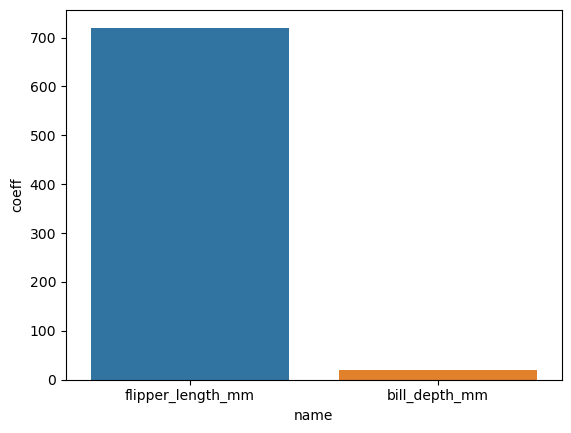

In [235]:
sns.barplot(x = fi_df["name"],y =fi_df["coeff"])

In [236]:
X_train["flipper_length_mm"].describe()

count    249.000000
mean     200.694779
std       14.009041
min      172.000000
25%      190.000000
50%      197.000000
75%      213.000000
max      231.000000
Name: flipper_length_mm, dtype: float64

### Encoding categorical variables

In [257]:
ca_df = pd.read_csv("marketing_customer_analysis_clean.csv")

In [258]:
ca_df.head()

,unnamed:_0,customer,state,customer_lifetime_value,response,coverage,education,effective_to_date,employmentstatus,gender,...,number_of_policies,policy_type,policy,renew_offer_type,sales_channel,total_claim_amount,vehicle_class,vehicle_size,vehicle_type,month
0,0,DK49336,Arizona,4809.216960,No,Basic,College,2011-02-18,Employed,M,...,9,Corporate Auto,Corporate L3,Offer3,Agent,292.800000,Four-Door Car,Medsize,A,2
1,1,KX64629,California,2228.525238,No,Basic,College,2011-01-18,Unemployed,F,...,1,Personal Auto,Personal L3,Offer4,Call Center,744.924331,Four-Door Car,Medsize,A,1
2,2,LZ68649,Washington,14947.917300,No,Basic,Bachelor,2011-02-10,Employed,M,...,2,Personal Auto,Personal L3,Offer3,Call Center,480.000000,SUV,Medsize,A,2
3,3,XL78013,Oregon,22332.439460,Yes,Extended,College,2011-01-11,Employed,M,...,2,Corporate Auto,Corporate L3,Offer2,Branch,484.013411,Four-Door Car,Medsize,A,1
4,4,QA50777,Oregon,9025.067525,No,Premium,Bachelor,2011-01-17,Medical Leave,F,...,7,Personal Auto,Personal L2,Offer1,Branch,707.925645,Four-Door Car,Medsize,A,1


In [259]:
ca_df = ca_df.drop(columns = ["unnamed:_0", "customer", "effective_to_date"])

In [260]:
ca_df

,state,customer_lifetime_value,response,coverage,education,employmentstatus,gender,income,location_code,marital_status,...,number_of_policies,policy_type,policy,renew_offer_type,sales_channel,total_claim_amount,vehicle_class,vehicle_size,vehicle_type,month
0,Arizona,4809.216960,No,Basic,College,Employed,M,48029,Suburban,Married,...,9,Corporate Auto,Corporate L3,Offer3,Agent,292.800000,Four-Door Car,Medsize,A,2
1,California,2228.525238,No,Basic,College,Unemployed,F,0,Suburban,Single,...,1,Personal Auto,Personal L3,Offer4,Call Center,744.924331,Four-Door Car,Medsize,A,1
2,Washington,14947.917300,No,Basic,Bachelor,Employed,M,22139,Suburban,Single,...,2,Personal Auto,Personal L3,Offer3,Call Center,480.000000,SUV,Medsize,A,2
3,Oregon,22332.439460,Yes,Extended,College,Employed,M,49078,Suburban,Single,...,2,Corporate Auto,Corporate L3,Offer2,Branch,484.013411,Four-Door Car,Medsize,A,1
4,Oregon,9025.067525,No,Premium,Bachelor,Medical Leave,F,23675,Suburban,Married,...,7,Personal Auto,Personal L2,Offer1,Branch,707.925645,Four-Door Car,Medsize,A,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10905,Nevada,15563.369440,No,Premium,Bachelor,Unemployed,F,0,Suburban,Married,...,7,Personal Auto,Personal L1,Offer3,Web,1214.400000,Luxury Car,Medsize,A,1
10906,Oregon,5259.444853,No,Basic,College,Employed,F,61146,Urban,Married,...,6,Personal Auto,Personal L3,Offer2,Branch,273.018929,Four-Door Car,Medsize,A,1
10907,Arizona,23893.304100,No,Extended,Bachelor,Employed,F,39837,Rural,Married,...,2,Corporate Auto,Corporate L3,Offer1,Web,381.306996,Luxury SUV,Medsize,A,2
10908,California,11971.977650,No,Premium,College,Employed,F,64195,Urban,Divorced,...,6,Personal Auto,Personal L1,Offer1,Branch,618.288849,SUV,Medsize,A,2


In [261]:
categoricals = ca_df.select_dtypes(include=object)
numericals = ca_df.select_dtypes(include = np.number)

In [268]:
ordinals = categoricals[["coverage","education","vehicle_size"]]
nominals = categoricals.drop(columns=["coverage","education","vehicle_size"])

In [269]:
from sklearn.preprocessing import OrdinalEncoder

In [270]:
enc = OrdinalEncoder(categories=[["Basic","Extended","Premium"]])

ordinals["coverage"] = enc.fit_transform(ordinals[["coverage"]])

enc = OrdinalEncoder(categories=[["High_"]])

ordinals["education"] = enc.fit_transform(ordinals[["education"]])

enc = OrdinalEncoder(categories=[["Basic","Extended","Premium"]])

ordinals["vehicle_size"] = enc.fit_transform(ordinals[["vehicle_size"]])


C:\Users\Aleks\AppData\Local\Temp\ipykernel_5072\3623293812.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ordinals["coverage"] = enc.fit_transform(ordinals[["coverage"]])


ValueError: Found unknown categories ['Bachelor', 'High School or Below', 'Doctor', 'Master', 'College'] in column 0 during fit

In [271]:
ordinals

,coverage,education,vehicle_size
0,0.0,College,Medsize
1,0.0,College,Medsize
2,0.0,Bachelor,Medsize
3,1.0,College,Medsize
4,2.0,Bachelor,Medsize
...,...,...,...
10905,2.0,Bachelor,Medsize
10906,0.0,College,Medsize
10907,1.0,Bachelor,Medsize
10908,2.0,College,Medsize


In [272]:
nominals = pd.get_dummies(nominals)

In [273]:
nominals

,state_Arizona,state_California,state_Nevada,state_Oregon,state_Washington,response_No,response_Yes,employmentstatus_Disabled,employmentstatus_Employed,employmentstatus_Medical Leave,...,sales_channel_Branch,sales_channel_Call Center,sales_channel_Web,vehicle_class_Four-Door Car,vehicle_class_Luxury Car,vehicle_class_Luxury SUV,vehicle_class_SUV,vehicle_class_Sports Car,vehicle_class_Two-Door Car,vehicle_type_A
0,1,0,0,0,0,1,0,0,1,0,...,0,0,0,1,0,0,0,0,0,1
1,0,1,0,0,0,1,0,0,0,0,...,0,1,0,1,0,0,0,0,0,1
2,0,0,0,0,1,1,0,0,1,0,...,0,1,0,0,0,0,1,0,0,1
3,0,0,0,1,0,0,1,0,1,0,...,1,0,0,1,0,0,0,0,0,1
4,0,0,0,1,0,1,0,0,0,1,...,1,0,0,1,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10905,0,0,1,0,0,1,0,0,0,0,...,0,0,1,0,1,0,0,0,0,1
10906,0,0,0,1,0,1,0,0,1,0,...,1,0,0,1,0,0,0,0,0,1
10907,1,0,0,0,0,1,0,0,1,0,...,0,0,1,0,0,1,0,0,0,1
10908,0,1,0,0,0,1,0,0,1,0,...,1,0,0,0,0,0,1,0,0,1


In [278]:
final_df = pd.concat([numericals,ordinals,nominals], axis=1)

In [279]:
final_df

,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,total_claim_amount,month,coverage,...,sales_channel_Branch,sales_channel_Call Center,sales_channel_Web,vehicle_class_Four-Door Car,vehicle_class_Luxury Car,vehicle_class_Luxury SUV,vehicle_class_SUV,vehicle_class_Sports Car,vehicle_class_Two-Door Car,vehicle_type_A
0,4809.216960,48029,61,7.000000,52,0.000000,9,292.800000,2,0.0,...,0,0,0,1,0,0,0,0,0,1
1,2228.525238,0,64,3.000000,26,0.000000,1,744.924331,1,0.0,...,0,1,0,1,0,0,0,0,0,1
2,14947.917300,22139,100,34.000000,31,0.000000,2,480.000000,2,0.0,...,0,1,0,0,0,0,1,0,0,1
3,22332.439460,49078,97,10.000000,3,0.000000,2,484.013411,1,1.0,...,1,0,0,1,0,0,0,0,0,1
4,9025.067525,23675,117,15.149071,31,0.384256,7,707.925645,1,2.0,...,1,0,0,1,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10905,15563.369440,0,253,15.149071,40,0.384256,7,1214.400000,1,2.0,...,0,0,1,0,1,0,0,0,0,1
10906,5259.444853,61146,65,7.000000,68,0.000000,6,273.018929,1,0.0,...,1,0,0,1,0,0,0,0,0,1
10907,23893.304100,39837,201,11.000000,63,0.000000,2,381.306996,2,1.0,...,0,0,1,0,0,1,0,0,0,1
10908,11971.977650,64195,158,0.000000,27,4.000000,6,618.288849,2,2.0,...,1,0,0,0,0,0,1,0,0,1


### Lab instructions : 
1) Compute R2 for the first model iteration + feature importance plot
2) Run the 2nd iteration of the model, adding the categorical data